## Nonlinear Stochastic Processes

In [2]:
# 导入需要的包
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import optimize
import statsmodels.formula.api as sfa
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
from statsmodels.stats.diagnostic import linear_reset
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Example 11.1

通过前面内容的讨论，如果双线性模型和ARMA-ARCH模型很容易混淆，那么Example 10.1 中我们对美元-英镑汇率建立的GARCH模型是否可能实际上是一个双线性模型呢？这可以通过计算差分以及差分平方的ACF和PACF来验证。

读入数据

In [2]:
data=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/dollar.csv")

首先计算差分序列的ACF和PACF

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


[ 1.00000000e+00  6.02573572e-02 -1.94567570e-02 -1.44126536e-02
  2.25025296e-03  9.72969433e-03  1.09559216e-02  2.65279854e-03
  5.11708126e-03 -4.32802502e-05  2.24241777e-03 -8.50366611e-03
 -1.23082464e-02  1.06197293e-02  1.40446652e-02  2.29685360e-02
  1.31164975e-02  6.61620569e-04 -1.15007250e-02  2.20798591e-02
  2.36861100e-02 -1.51175336e-05 -8.19596884e-03 -2.34188605e-02
 -4.14798029e-03  6.92501847e-03  1.39171467e-03  1.68972941e-02
  2.38366974e-02  1.09748912e-03 -1.79440182e-03 -6.97776062e-03
  1.08800065e-02  1.87311052e-02  1.99114419e-02  1.41053325e-02
 -1.04023132e-02 -1.32680354e-02 -1.50275153e-02  3.61760386e-03
  7.36677938e-03]
[ 1.00000000e+00  6.02629278e-02 -2.31761422e-02 -1.18695299e-02
  3.42933388e-03  8.87002285e-03  9.80791529e-03  1.84878502e-03
  5.53212312e-03 -3.81521414e-04  2.41897199e-03 -8.90458054e-03
 -1.13932510e-02  1.17045254e-02  1.19194982e-02  2.16512108e-02
  1.14391387e-02  7.46751463e-04 -1.05956901e-02  2.34914215e-02
  1.998

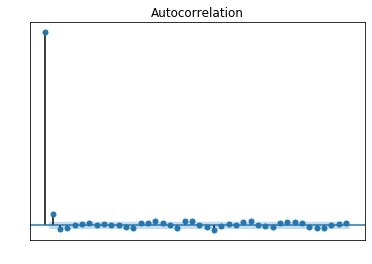

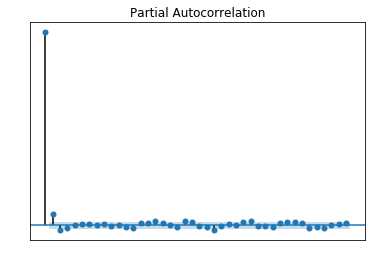

In [3]:
w=data.diff().dropna(axis=0,how='all')
ACF = smt.stattools.acf(w)
PACF=smt.stattools.pacf(w)
print(ACF)
print(PACF)
plot_acf(w)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plot_pacf(w)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()

从结果可以看出，差分序列的ACF和PACF都只有一阶显著，一阶之后截尾，因此符合AR(1)模型。

下面计算差分的平方的序列的ACF和PACF。

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


[1.         0.13404678 0.08345465 0.09261913 0.11522487 0.11680067
 0.07474268 0.08394653 0.07286871 0.06080254 0.09012398 0.06997063
 0.0575357  0.05819061 0.07557434 0.0658029  0.06747099 0.08160639
 0.05696532 0.06235783 0.05512143 0.05323343 0.04964152 0.0619944
 0.05271335 0.05915318 0.04439821 0.0450222  0.07721912 0.05582719
 0.04041854 0.04278155 0.04006013 0.07824951 0.04381371 0.04134965
 0.04708454 0.05848917 0.07229638 0.04981035 0.05695665]
[ 1.00000000e+00  1.34059172e-01  6.66968862e-02  7.49339520e-02
  9.18654200e-02  8.43707555e-02  3.48808255e-02  4.78153490e-02
  3.14804583e-02  1.91193040e-02  5.30407174e-02  2.70461311e-02
  1.60842288e-02  1.96725402e-02  3.66523864e-02  2.22615860e-02
  2.81938969e-02  4.14320001e-02  1.09287376e-02  2.03623022e-02
  1.09831765e-02  9.10905144e-03  7.52039790e-03  2.38701034e-02
  1.00185719e-02  2.05265802e-02  3.88580189e-03  5.11004799e-03
  4.05130960e-02  1.29120195e-02 -9.36316436e-04  4.33630649e-03
  2.35380091e-04  4.02

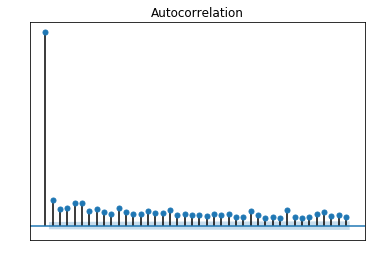

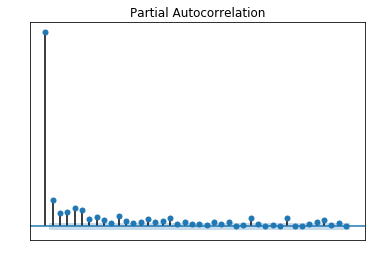

In [4]:
w2=w*w
ACF = smt.stattools.acf(w2)
PACF=smt.stattools.pacf(w2)
print(ACF)
print(PACF)
plot_acf(w2)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plot_pacf(w2)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()



可以看出，所有的前面所有的ACF都显著为正（事实上，前100个自相关函数都是显著的），很多PACF也是如此，因此用ARMA(1,1)可能更为合适。

这也相当于R和S都取1的对角线双线性模型，可以对一阶差分关于其延迟及延迟的平方进行最小二乘拟合，然后对残差进行拉格朗日乘子检验。

In [5]:
data=data.dropna(axis=0,how='all')
e=np.random.randn(len(w)+1)       # 严格白噪声
data['w_lag']=w
data['w']=w
data['e']=e
data['e_lag']=e
for i in range(len(e)-1):
    data['w'][i]=data['w'][i+1]
    data['w_lag'][i]=data['w_lag'][i+1]
    data['e'][i]=data['e'][i+1]
for i in range(len(e)-1):
    data['w'][i]=data['w'][i+1]
data=data.drop(labels=[10817,10818],axis=0)
data['w_lag_e_lag']=data['w_lag']*data['e_lag']

In [12]:
bilinear_model = sfa.ols(formula='w ~ w_lag + e+e_lag+w_lag*e_lag', data=data)
bilinear_model = bilinear_model.fit()
print("最小二乘法拟合结果如下：")
print(bilinear_model.summary())

最小二乘法拟合结果如下：
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     10.33
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.40e-08
Time:                        14:11:56   Log-Likelihood:                 34238.
No. Observations:               10817   AIC:                        -6.847e+04
Df Residuals:                   10812   BIC:                        -6.843e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.602e-05   9.82e-05    

即得到的双线性模型是：
w[t]=0.0604*w[t-1]-0.0031*w[t-1]*e[t-1]+0.0001*e[t-1]

### Example 11.3

读入英国gilt数据，并对差分序列作图查看如下，从图像上来看，两侧波动较小，中间波动较到，因此考虑使用非线性模型。

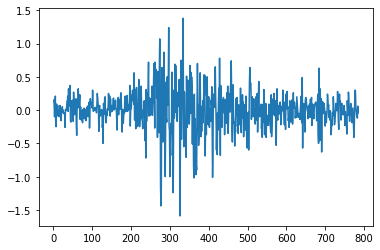

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    r20   No. Observations:                  785
Model:                     AutoReg(2)   Log Likelihood                -110.628
Method:               Conditional MLE   S.D. of innovations              0.279
Date:                Tue, 11 Aug 2020   AIC                             -2.545
Time:                        16:39:15   BIC                             -2.521
Sample:                             2   HQIC                            -2.536
                                  785                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0028      0.010     -0.277      0.782      -0.022       0.017
r20.L1         0.3041      0.035      8.578      0.000       0.235       0.374
r20.L2        -0.1263      0.035     -3.562      0.000      -0.196      -0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2042           -2.5435j            2.8142           -0.1796
AR.2            1.2042           +2.5435j            2.8142            0.1796
-----------------------------------------------------------------------------
"""

In [63]:
r20=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/r20.csv")
d=r20['r20'].diff().dropna(axis=0,how='all')
plt.plot(d)
plt.show()
resultAR = AutoReg(d, 2).fit()
resultAR.summary()

使用ESTAR模型拟合数据

In [64]:
x=np.zeros(len(d))
x_lag=np.zeros(len(d))
x_lag2=np.zeros(len(d))
for i in range(len(x)):
    x[i]=d[i+1]
for i in range(len(x)-1):
    x_lag[i+1]=d[i+1]
for i in range(len(x)-2):
    x_lag2[i+2]=d[i+1]
x=np.delete(x,[0,1],axis=0)
x_lag=np.delete(x_lag,[0,1],axis=0)
x_lag2=np.delete(x_lag2,[0,1],axis=0)

In [68]:
def ESTAR(input,a1,r,c,a11,a2):
    return a1*input[0]+np.exp(-r*(input[1]-c)**2)*(a11*input[0]+a2*input[1])
input=[x_lag,x_lag2]
popt, pcov=optimize.curve_fit(ESTAR,input,x,maxfev=500000)
print(popt)

[ 3.12973708e-01  9.00964885e-03  7.74021630e+01 -5.96242719e+21
 -1.87165752e+22]


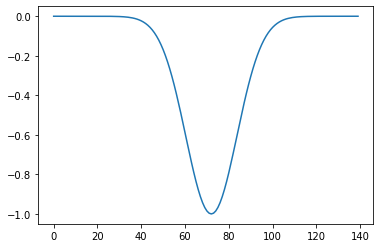

In [86]:
x=np.arange(-1.2, 0.2, 0.01)
y=-np.exp(-36.71*(x+0.48)**2)
plt.plot(y)
plt.show()

可以看出，对称的非线性的指数函数可以很好地刻画时间序列中间部分较大的波动性。

### Example 11.4

In [22]:
# 读入数据
dollar=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/dollar.csv")['dollar']
dollar=dollar.dropna(how='all')

进行马尔可夫状态转移过程的拟合

In [33]:
markov=MarkovRegression(dollar,2,trend='nc').fit()
markov.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                 dollar   No. Observations:                10819
Model:               MarkovRegression   Log Likelihood              -21071.950
Date:                Tue, 11 Aug 2020   AIC                          42149.899
Time:                        14:56:17   BIC                          42171.767
Sample:                             0   HQIC                         42157.272
                              - 10819                                         
Covariance Type:               approx                                         
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.8791      0.039     73.549      0.000       2.802       2.956
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.5000   2059.949      0.000      1.000   -4036.925    4037.925
p[1->0]        0.5000   2616.333      0.000      1.000   -5127.419    5128.419
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

### Example 11.5

读入数据，用AR(2)模型拟合如下


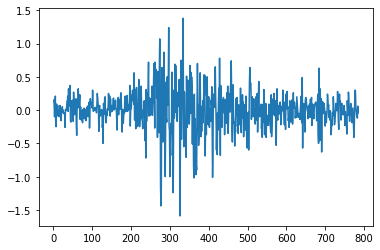

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    r20   No. Observations:                  785
Model:                     AutoReg(2)   Log Likelihood                -110.628
Method:               Conditional MLE   S.D. of innovations              0.279
Date:                Tue, 11 Aug 2020   AIC                             -2.545
Time:                        17:40:18   BIC                             -2.521
Sample:                             2   HQIC                            -2.536
                                  785                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0028      0.010     -0.277      0.782      -0.022       0.017
r20.L1         0.3041      0.035      8.578      0.000       0.235       0.374
r20.L2        -0.1263      0.035     -3.562      0.000      -0.196      -0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2042           -2.5435j            2.8142           -0.1796
AR.2            1.2042           +2.5435j            2.8142            0.1796
-----------------------------------------------------------------------------
"""

In [3]:
r20=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/r20.csv")
d=r20['r20'].diff().dropna(axis=0,how='all')
plt.plot(d)
plt.show()
AR=AutoReg(d, 2)
resultAR = AR.fit()
resultAR.summary()

进行混成检验，发现其残差的平方是显著的

In [48]:
sm.stats.acorr_ljungbox(resultAR.resid, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,9.575285,0.653165


ARMA过程的零一特征是时间可逆性，为此进行K=1和k=1的TR检验

In [58]:
x=[0]*len(d)
x[0]=d[1]
x[1]=d[2]
e=np.random.randn(len(x))*0.279
for i in range(2,len(x)):
    x[i]=0.304*x[i-1]-0.126*x[i-2]+e[i]
residual=d-x
T=len(d)
k=1
B12=0
for i in range(1,T-k+1):
    B12+=residual[i+k]*residual[i]**2
B12=B12/(T-k)
B21=0
for i in range(1,T-k+1):
    B21+=residual[i+k]**2*residual[i]
B21=B21/(T-k)
print("k=1时的TR检验统计量为",B21-B12)


k=1时的TR检验统计量为 0.0035930014224123774


In [60]:
k=2
B12=0
for i in range(1,T-k+1):
    B12+=residual[i+k]*residual[i]**2
B12=B12/(T-k)
B21=0
for i in range(1,T-k+1):
    B21+=residual[i+k]**2*residual[i]
B21=B21/(T-k)
print("k=2时的TR检验统计量的为",B21-B12)


k=2时的TR检验统计量为 0.0025225875757342846


TR检验的原假设是时间可逆，即对任何的k，TR统计量的结果都为0，从上述结果来看，TR统计量不显著，因此不能否定原假设。

